## Importing Libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data 

In [39]:
df = pd.read_csv('diabetes.csv')

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


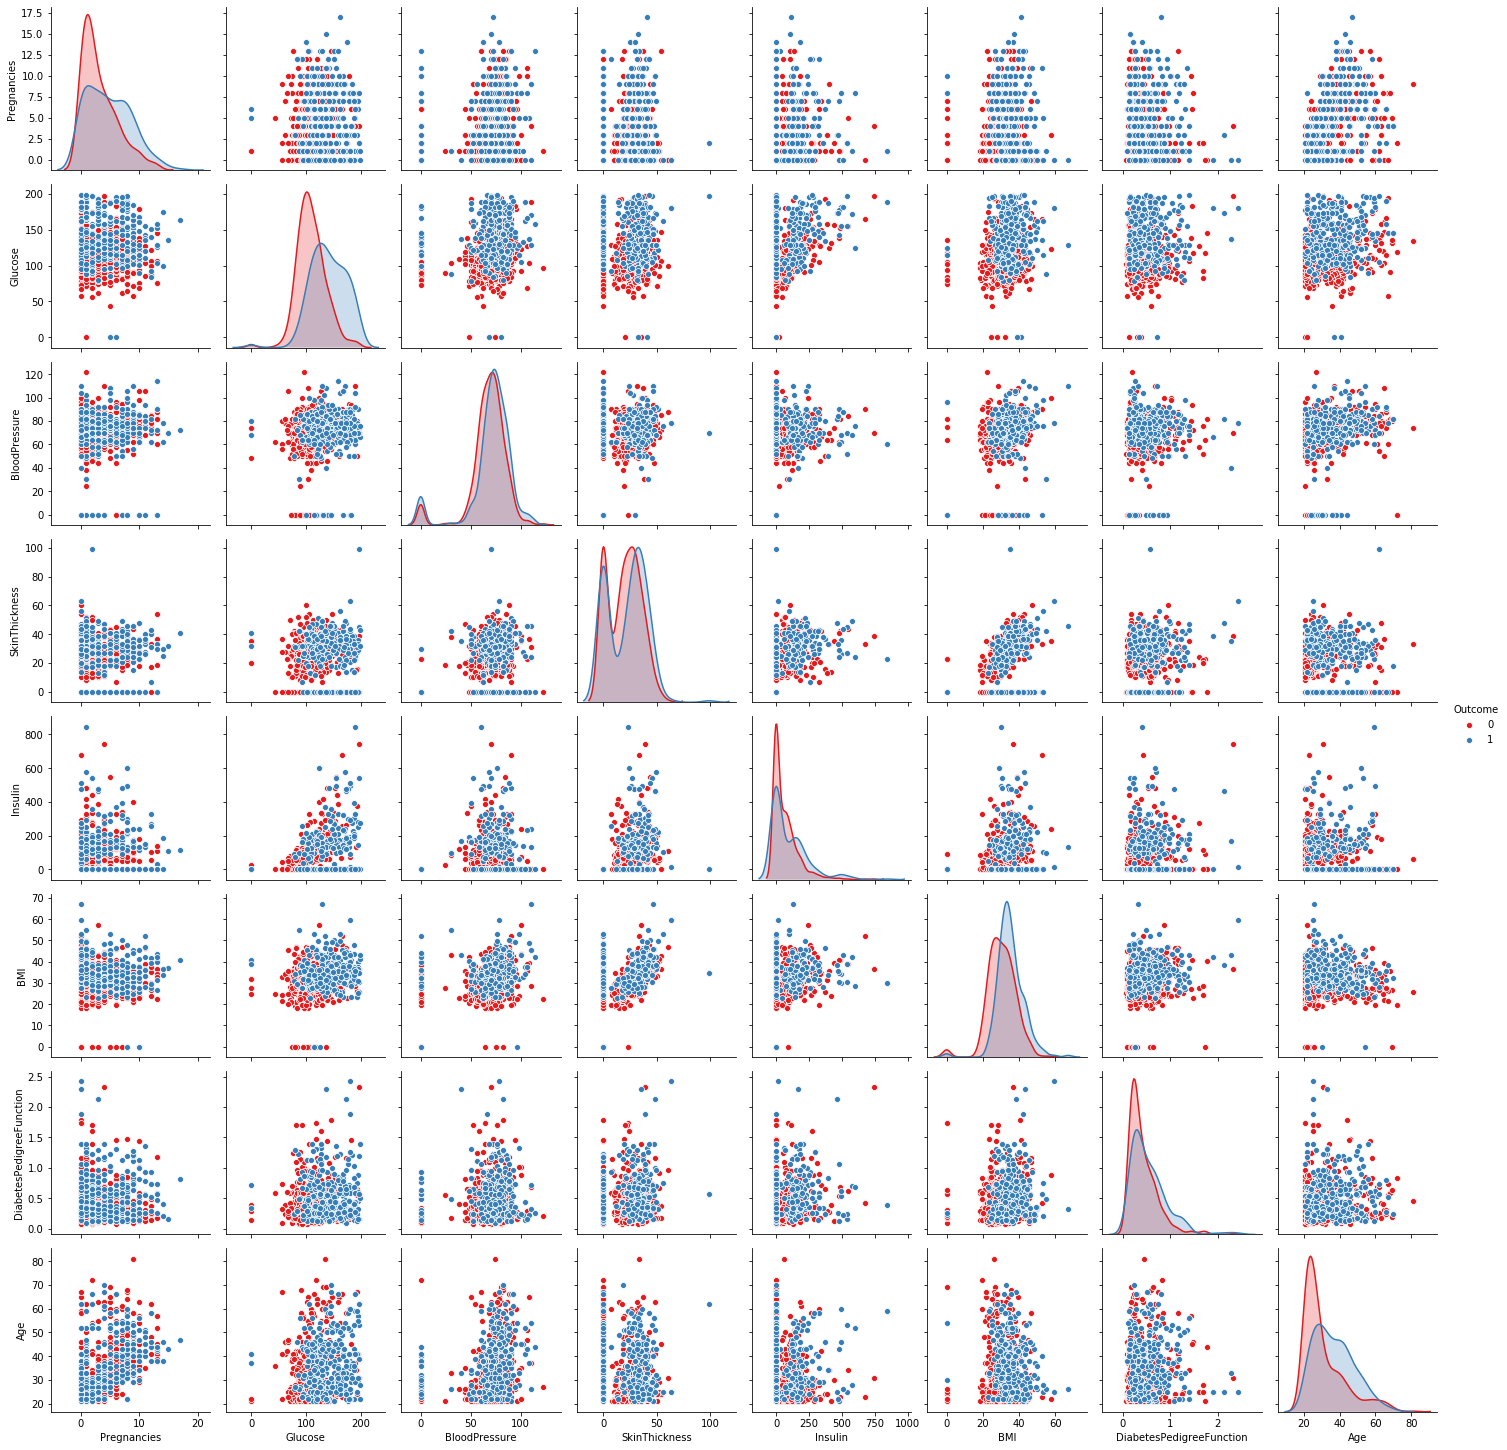

In [42]:
sns.pairplot(df, hue = 'Outcome', palette='Set1')

## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state = 123)

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
predictions = dtree.predict(X_test)

In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       143
           1       0.70      0.73      0.71        88

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.78       231



In [69]:
print(confusion_matrix(y_test,predictions))

[[110  33]
 [ 31  57]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [103]:
from sklearn import tree

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=1200)
tree.plot_tree(dtree, filled = True)
fig.savefig('DT.png')

# Comparison with Other Approaches 

## Logistic Regression 

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
log_predictions = logmodel.predict(X_test)

In [63]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       143
           1       0.78      0.65      0.71        88

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.80      0.79       231



In [64]:
print(confusion_matrix(y_test,log_predictions))

[[127  16]
 [ 31  57]]


## LPM

In [70]:
from sklearn.linear_model import LinearRegression

In [73]:
lpm = LinearRegression().fit(X_train, y_train) 

In [74]:
y_hat = skols.predict(X_test)

In [80]:
# Use 0.5 as cut-off value 

# Here is the prediction result. 

lpm_predictions = (y_hat>0.5) 

In [81]:
print(classification_report(y_test,lpm_predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       143
           1       0.80      0.65      0.72        88

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231



In [82]:
print(confusion_matrix(y_test,lpm_predictions))

[[129  14]
 [ 31  57]]


## KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

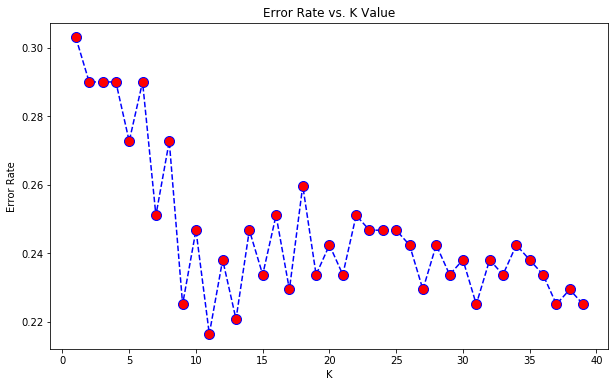

In [85]:
 
plt.figure(figsize=(10,6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
k = 11
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=', k)
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K= 11


[[126  17]
 [ 33  55]]


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       143
           1       0.76      0.62      0.69        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [87]:
print(confusion_matrix(y_test,pred))

[[126  17]
 [ 33  55]]
